In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import cv2
import math
from PIL import Image
from scipy.fft import dct, idct

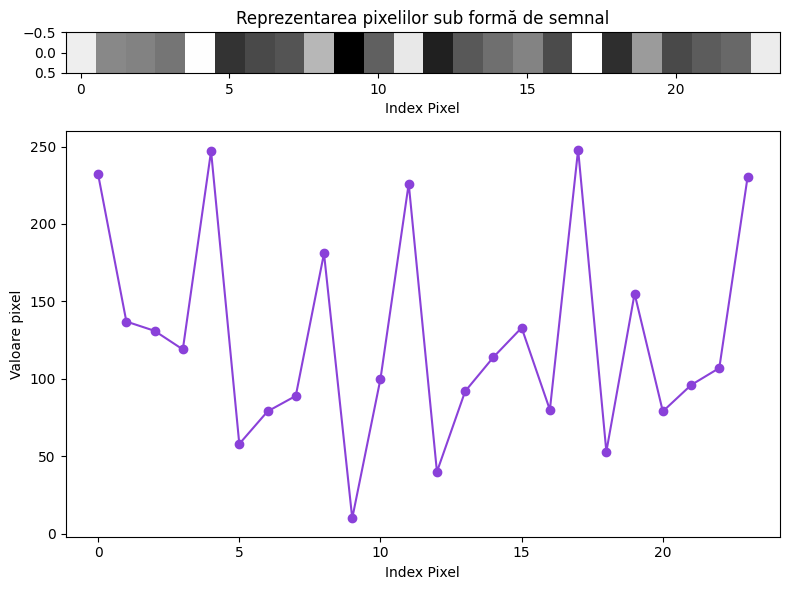

In [25]:
random_pixels = np.random.randint(0, 256, size=24)

fig, axs = plt.subplots(2, 1, figsize=(8, 6), gridspec_kw={'height_ratios': [1, 10]})

axs[0].imshow([random_pixels], cmap='gray', aspect='auto')
axs[0].set_title('Reprezentarea pixelilor sub formă de semnal')
axs[0].set_xlabel('Index Pixel')
# axs[0].set_ylabel('Row')

axs[1].plot(random_pixels, marker='o', color='#8a41d9')
# axs[1].set_title('Signal Plot')
axs[1].set_xlabel('Index Pixel')
axs[1].set_ylabel('Valoare pixel')

plt.tight_layout()

# Show the plot
plt.show()

Imaginea originală
[[ -31   60 -128  -63  -14  -43   44   84]
 [  55   67  -60  -73   12   49   89  101]
 [ -57  -37   -5   47 -117   68   85   74]
 [  48   73  100 -121   64    5  -50  -47]
 [  24 -110  -83   80  -31  -98  -76   32]
 [ -81  -50   74  -65  116   42   56  109]
 [  87  101   64  106   81   82   70   12]
 [  47   82   24   13 -112   82  -19 -118]]


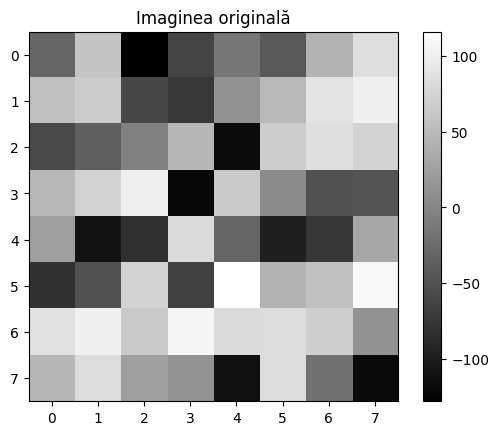

[[ 1.02500000e+02 -5.11118374e+01  8.22829708e+01  1.98810130e+01
  -3.70000000e+01 -3.09247057e+01 -6.48172136e+00 -2.06091721e+01]
 [-7.14850520e+01 -1.27384700e+02  1.42839817e+02 -8.52472774e+00
   2.89310627e+01 -5.25697726e+01 -6.73967456e+01  2.76355044e-01]
 [ 5.55127116e+01  1.76101081e+01  6.53921356e+01  6.34704874e+01
  -8.68552579e+01 -2.34508587e+00 -8.54901154e+01 -9.66979139e+01]
 [-8.71909347e+00 -1.13941120e+02 -7.79326375e+00 -3.29102092e+01
   1.42209285e+02 -7.18482753e+01 -5.36428782e+01  8.65474043e+01]
 [-1.73000000e+02  1.52831512e+02  1.01762731e+01  1.72341396e+01
   3.50000000e+01 -1.52860260e+01 -1.07095035e+01 -2.07990581e+01]
 [ 9.82589697e+01  5.07853339e+01 -4.20266673e+01 -1.35071883e-01
  -5.97836236e+01 -5.30090550e+01 -1.52189436e+01  5.06769357e+01]
 [-8.87494442e+01 -1.23719819e+02 -2.19901154e+01 -6.92348372e+01
  -6.00856820e+01  2.35251962e+01  3.71078644e+01 -1.49634244e+01]
 [-4.63806492e+01 -2.90104415e+01 -1.17998726e+01 -5.50482828e+01
   

-31,60,-128,-63,-14,-43,44,84
55,67,-60,-73,12,49,89,101
-57,-37,-5,47,-117,68,85,74
48,73,100,-121,64,5,-50,-47
24,-110,-83,80,-31,-98,-76,32
-81,-50,74,-65,116,42,56,109
87,101,64,106,81,82,70,12
47,82,24,13,-112,82,-19,-118


DataFrame after dct on rows:


-32,-78,112,5,15,-68,-102,-26
84,-70,-124,60,-17,-47,-35,-2
20,-119,37,-52,-57,84,23,-89
25,106,11,32,-65,-101,48,105
-92,-3,2,-38,-90,62,3,-39
71,110,-31,-34,-15,-72,46,112
-43,47,-35,30,-10,14,-28,-21
0,118,4,52,-119,42,25,-97


DataFrame after dct on columns:


102,-51,82,19,-37,-30,-6,-20
-71,-127,-114,-8,28,-52,-67,0
55,17,65,63,-86,-2,-85,-96
-8,-113,-7,-32,-114,-71,-53,86
83,-104,10,17,34,-15,-10,-20
98,50,-42,0,-59,-53,-15,50
-88,-123,-21,-69,-60,23,37,-14
-46,-29,-11,-55,110,-104,-42,103


In [23]:
def print_and_plot(matrix, title):
    print(title)
    print(matrix)
    plt.imshow(matrix, cmap='gray', interpolation='nearest')
    plt.title(title)
    plt.colorbar()
    plt.show()

image = np.random.randint(-128, 128, size=(8, 8), dtype=np.int8)
print_and_plot(image, 'Imaginea originală')

dct_rows = dct(image, axis=1, norm='ortho')
# print(dct_rows)

dct_columns = dct(dct_rows, axis=0, norm='ortho')
print(dct_columns)

idct_columns = idct(dct_columns, axis=0, norm='ortho')
# print(idct_columns)

idct_rows = idct(idct_columns, axis=1, norm='ortho')
# print(idct_rows)

print(idct_rows.astype(np.int8))

df_image = pd.DataFrame(image.astype(np.int8))
df_dct_rows = pd.DataFrame(dct_rows.astype(np.int8))
df_dct_columns = pd.DataFrame(dct_columns.astype(np.int8))

print("DataFrame from image:")
display(df_image.head(8).style.hide(axis=0).hide(axis=1))

print("DataFrame after dct on rows:")
display(df_dct_rows.head(8).style.hide(axis=0).hide(axis=1))

print("DataFrame after dct on columns:")
display(df_dct_columns.head(8).style.hide(axis=0).hide(axis=1))

In [6]:
def open_image(path):
    image = cv2.imread(path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image

def initialize_centroids(image, clusters):
    height, width, _ = image.shape
    indices = np.random.choice(height * width, size=clusters, replace=False)
    starting_centroids = image.reshape(-1, 3)[indices]
    
    return starting_centroids

def assign_to_clusters(image, centroids):
    pixels = image.reshape(-1, 3)
    centroids_reshaped = centroids.reshape(1, -1, 3)
    distances = np.linalg.norm(pixels[:, np.newaxis, :] - centroids_reshaped, axis=2)
    clusters = np.argmin(distances, axis=1)
    clusters = clusters.reshape(image.shape[0], image.shape[1])
    
    return clusters.astype(int)

def update_centroids(image, clusters, k):
    centroids = np.zeros((k, 3))
    
    for i in range(k):
        cluster_points = image[clusters == i]
        if len(cluster_points) > 0:
            centroids[i] = np.mean(cluster_points, axis=0)
    
    return centroids

def show_save_image(centroids, compressed_image, k, iteration, save_path=None):
    colors = centroids
    k_sqrt = int(np.ceil(math.sqrt(k)))

    if not k_sqrt ** 2 == k:
        padded_colors = np.ones((k_sqrt ** 2, 3)) * 255
        padded_colors[:colors.shape[0], :] = colors.reshape(-1, 3)
        colors = padded_colors
    else:
        k_sqrt = int(k_sqrt)

    fig, ax = plt.subplots(1, 2, figsize=(20, 10))

    for i in range(k_sqrt):
        for j in range(k_sqrt):
            ax[0].add_patch(plt.Rectangle((i, j), 0.9, 0.9, facecolor=colors[i * k_sqrt + j] / 255))

    ax[0].set_xlim((-0.2, k_sqrt))
    ax[0].set_ylim((-0.2, k_sqrt))
    ax[0].set_title("Centroizi")

    ax[1].imshow(compressed_image)
    ax[1].set_title("Imagine Compresată")

    plt.suptitle("Iterația {}".format(iteration))
    if save_path:
        plt.savefig(save_path)
    else:
        plt.show()
    plt.close()

def k_means(image, k, max_iterations=300, save_path_prefix="smoky/iteration"):
    centroids = initialize_centroids(image, k)
    gif_image = []

    for iteration in range(max_iterations):
        clusters = assign_to_clusters(image, centroids)
        new_centroids = update_centroids(image, clusters, k)

        if np.allclose(centroids, new_centroids, rtol=1e-2):
            break

        centroids = new_centroids

        compressed_image = centroids[clusters]
        save_path = "{}_{}.png".format(save_path_prefix, iteration + 1)
        show_save_image(centroids, compressed_image.astype(np.uint8), k, iteration + 1, save_path)
        gif_image.append(Image.open(save_path))

    gif_path = "smoky/smoky_animation.gif"
    gif_image[0].save(gif_path, save_all=True, append_images=gif_image[1:], duration=200, loop=0)
    cv2.imwrite("smoky_after_kmeans_{}.jpeg".format(k), cv2.cvtColor(compressed_image.astype(np.uint8), cv2.COLOR_RGB2BGR))

    return compressed_image.astype(np.uint8)

path = 'smoky_uncompressed.jpg'
image = open_image(path)
k = 64

if not int(np.ceil(math.sqrt(k))) ** 2 == k:
    print("K squared nu este pătrat perfect. Vom aplica padding cu culori albe.")

compressed_image = k_means(image, k)


K squared nu este pătrat perfect. Vom aplica padding cu culori albe.
